In [15]:
import torch
import torchvision
from torchvision import transforms , datasets
import torch.nn as nn
import torch.nn.functional as F

In [16]:
train = datasets.MNIST('' , train=True , download=True , 
        transform = transforms.Compose([transforms.ToTensor()]))

In [17]:
test =  datasets.MNIST('' , train=False , download=True , 
        transform = transforms.Compose([transforms.ToTensor()]))

In [30]:
trainset = torch.utils.data.DataLoader(train , batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test , batch_size=10,shuffle=True)

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28 , 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))        
        x = F.relu(self.fc3(x))        
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
X = torch.rand(28,28)
X = X.view(-1,28*28)

In [20]:
output = net(X)

In [21]:
output

tensor([[-2.1471, -2.4213, -2.2404, -2.3367, -2.3687, -2.2023, -2.3543, -2.2301,
         -2.4004, -2.3646]], grad_fn=<LogSoftmaxBackward>)

In [68]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters() , lr = 0.001)


epochs =3

for epoch in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        #backpropagate the loss
        loss.backward()
        optimizer.step()
        
    print(loss)

    

tensor(0.0651, grad_fn=<NllLossBackward>)
tensor(0.0281, grad_fn=<NllLossBackward>)
tensor(0.1085, grad_fn=<NllLossBackward>)


In [69]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X ,y =data
        output = net(X.view(-1,784))
        for idx , i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total +=1
            
print('Accuracy: ' , round(correct/total,3))

Accuracy:  0.975


In [70]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [71]:
import matplotlib.pyplot as plt

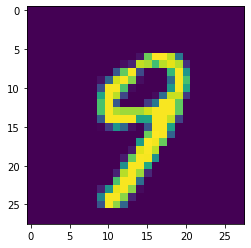

In [74]:
plt.imshow(X[1].view(28,28))

In [75]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(9, grad_fn=<NotImplemented>)
